In [72]:
#Import all necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from scipy.special import gammaln
from scipy.optimize import least_squares
from scipy.linalg import expm

In [73]:
#First an example on how to insert data in pandas
#1. Obtain data
data = {'A': [1, 2, 3],
        'B': [4, 5, 6],
        'C': [7, 8, 9]
        }
#2.Create DataFrame
df = pd.DataFrame(data)
print(df)

#3.Create correlation matrix
corrM = df.corr()

print(corrM)

   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9
     A    B    C
A  1.0  1.0  1.0
B  1.0  1.0  1.0
C  1.0  1.0  1.0


In [74]:
#Insert the data from the assignment
data = {'time/gene':[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190],
        'SWI5': [0.076, 0.0186, 0.009, 0.0117, 0.0088, 0.0095, 0.0075, 0.007, 0.0081, 0.0057, 0.0052, 0.0093, 0.0055, 0.006, 0.0069, 0.0093, 0.009, 0.0129, 0.0022, 0.0018],
        'CBF1': [0.0419, 0.0365, 0.0514, 0.0473, 0.0482, 0.0546, 0.0648, 0.0552, 0.0497, 0.0352, 0.0358, 0.0338, 0.0309, 0.0232, 0.0191, 0.019, 0.0176, 0.0105, 0.0081, 0.0072],
        'GAL4': [0.0207, 0.0122, 0.0073, 0.0079, 0.0084, 0.01, 0.0096, 0.0107, 0.0113, 0.0116, 0.0073, 0.0075, 0.0082, 0.0078, 0.0089, 0.0104, 0.0114, 0.01, 0.0086, 0.0078],
        'GAL80':[0.0225, 0.0175, 0.0165, 0.0147, 0.0145, 0.0144, 0.0106, 0.0119, 0.0104, 0.0142, 0.0084, 0.0097, 0.0088, 0.0087, 0.0086, 0.011, 0.0124, 0.0093, 0.0079, 0.0103],
        'ASH1': [0.103, 0.0462, 0.0439, 0.0371, 0.0475, 0.0468, 0.0347, 0.0247, 0.0269, 0.019, 0.0134, 0.0148, 0.0101, 0.0088, 0.008, 0.009, 0.0113, 0.0154, 0.003, 0.0012]
        }
dataFrame = pd.DataFrame(data)

In [75]:
#Transform data to easier format to deal with
t_data = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190])
y_data = np.array([[0.076, 0.0186, 0.009, 0.0117, 0.0088, 0.0095, 0.0075, 0.007, 0.0081, 0.0057, 0.0052, 0.0093, 0.0055, 0.006, 0.0069, 0.0093, 0.009, 0.0129, 0.0022, 0.0018],
                   [0.0419, 0.0365, 0.0514, 0.0473, 0.0482, 0.0546, 0.0648, 0.0552, 0.0497, 0.0352, 0.0358, 0.0338, 0.0309, 0.0232, 0.0191, 0.019, 0.0176, 0.0105, 0.0081, 0.0072],
                   [0.0207, 0.0122, 0.0073, 0.0079, 0.0084, 0.01, 0.0096, 0.0107, 0.0113, 0.0116, 0.0073, 0.0075, 0.0082, 0.0078, 0.0089, 0.0104, 0.0114, 0.01, 0.0086, 0.0078],
                   [0.0225, 0.0175, 0.0165, 0.0147, 0.0145, 0.0144, 0.0106, 0.0119, 0.0104, 0.0142, 0.0084, 0.0097, 0.0088, 0.0087, 0.0086, 0.011, 0.0124, 0.0093, 0.0079, 0.0103],
                   [0.103, 0.0462, 0.0439, 0.0371, 0.0475, 0.0468, 0.0347, 0.0247, 0.0269, 0.019, 0.0134, 0.0148, 0.0101, 0.0088, 0.008, 0.009, 0.0113, 0.0154, 0.003, 0.0012]
                    ])

In [76]:
#Re-sort y_data
Y_data = np.zeros((len(y_data[0,:]),5))

for i in range(len(y_data[:,0])):
  for j in range(len(y_data[0,:])):
    Y_data[j][i] = y_data[i][j]

print(Y_data)

[[0.076  0.0419 0.0207 0.0225 0.103 ]
 [0.0186 0.0365 0.0122 0.0175 0.0462]
 [0.009  0.0514 0.0073 0.0165 0.0439]
 [0.0117 0.0473 0.0079 0.0147 0.0371]
 [0.0088 0.0482 0.0084 0.0145 0.0475]
 [0.0095 0.0546 0.01   0.0144 0.0468]
 [0.0075 0.0648 0.0096 0.0106 0.0347]
 [0.007  0.0552 0.0107 0.0119 0.0247]
 [0.0081 0.0497 0.0113 0.0104 0.0269]
 [0.0057 0.0352 0.0116 0.0142 0.019 ]
 [0.0052 0.0358 0.0073 0.0084 0.0134]
 [0.0093 0.0338 0.0075 0.0097 0.0148]
 [0.0055 0.0309 0.0082 0.0088 0.0101]
 [0.006  0.0232 0.0078 0.0087 0.0088]
 [0.0069 0.0191 0.0089 0.0086 0.008 ]
 [0.0093 0.019  0.0104 0.011  0.009 ]
 [0.009  0.0176 0.0114 0.0124 0.0113]
 [0.0129 0.0105 0.01   0.0093 0.0154]
 [0.0022 0.0081 0.0086 0.0079 0.003 ]
 [0.0018 0.0072 0.0078 0.0103 0.0012]]


In [77]:
#Discretize the data
thresh1 = np.quantile(Y_data, 0.25, axis=0)
thresh2 = np.quantile(Y_data, 0.75, axis=0)

Y_disc = 2.0*np.ones(Y_data.shape)
for j in range(5):
    Y_disc[Y_data[:,j] <= thresh1[j], j] = 1
    Y_disc[Y_data[:,j] >= thresh2[j], j] = 3

print(Y_disc)


[[3. 2. 3. 3. 3.]
 [3. 2. 3. 3. 3.]
 [2. 3. 1. 3. 3.]
 [3. 2. 2. 3. 2.]
 [2. 2. 2. 3. 3.]
 [3. 3. 2. 2. 3.]
 [2. 3. 2. 2. 2.]
 [2. 3. 2. 2. 2.]
 [2. 3. 3. 2. 2.]
 [1. 2. 3. 2. 2.]
 [1. 2. 1. 1. 2.]
 [2. 2. 1. 2. 2.]
 [1. 2. 2. 1. 2.]
 [2. 2. 1. 1. 1.]
 [2. 2. 2. 1. 1.]
 [2. 1. 2. 2. 1.]
 [2. 1. 3. 2. 2.]
 [3. 1. 2. 2. 2.]
 [1. 1. 2. 1. 1.]
 [1. 1. 1. 2. 1.]]


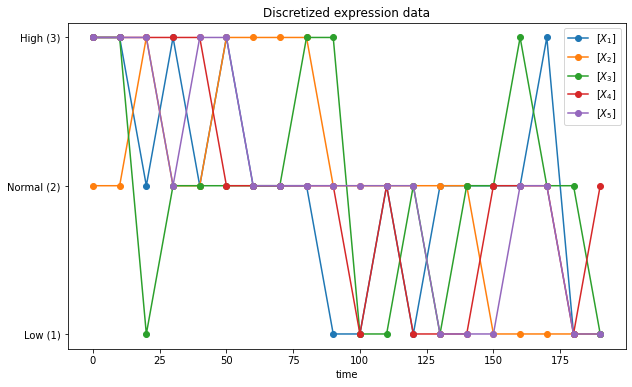

In [78]:
#Display discretized data
plt.figure(figsize=(10,6))
plt.plot(t_data, Y_disc, marker = "o")
plt.legend(('$[X_1]$', '$[X_2]$', '$[X_3]$','$[X_4]$','$[X_5]$'))
plt.xlabel('time')
plt.yticks([1,2,3])
plt.yticks([1,2,3], ['Low (1)', 'Normal (2)', 'High (3)'])
plt.title("Discretized expression data")
plt.show()

In [79]:
#Choose selected columns of discrete data
disc = Y_disc[:,2:5]
print(disc)

[[3. 3. 3.]
 [3. 3. 3.]
 [1. 3. 3.]
 [2. 3. 2.]
 [2. 3. 3.]
 [2. 2. 3.]
 [2. 2. 2.]
 [2. 2. 2.]
 [3. 2. 2.]
 [3. 2. 2.]
 [1. 1. 2.]
 [1. 2. 2.]
 [2. 1. 2.]
 [1. 1. 1.]
 [2. 1. 1.]
 [2. 2. 1.]
 [3. 2. 2.]
 [2. 2. 2.]
 [2. 1. 1.]
 [1. 2. 1.]]


In [100]:
# Chose selected columns of discrete data for LOC. We leave out the first column
disc = np.append(Y_disc[:,3].reshape(20,1),Y_disc[:,4].reshape(20,1),axis=1)
disc

array([[3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 2.],
       [3., 3.],
       [2., 3.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [1., 2.],
       [2., 2.],
       [1., 2.],
       [1., 1.],
       [1., 1.],
       [2., 1.],
       [2., 2.],
       [2., 2.],
       [1., 1.],
       [2., 1.]])

After this we use the necessary blocks of code depending on if we have 3 or 2 genes as input.

In [80]:
def frequencies(y):
    """Compute observed state frequencies of one gene.
        
    :param y: a 1-D numpy array containing observations of one gene
    :returns: A 1-D numpy array freqs, which has shape (3,) and
       - freqs[0] = #obs. where the gene is under-expressed
       - freqs[1] = #obs. where the gene is normally expressed
       - freqs[2] = #obs. where the gene is over-expressed
    """
    return np.array([sum(y == 1), sum(y == 2), sum( y == 3)])

In [81]:
#Code to find frequency pairs with 3 genes as input
def frequencies_pair(y, y_parent):
    """Compute observed state pair frequencies of a gene and its parent.
        
    :param y: a 1-D numpy array containing observations of a gene
    :param y_parent: a 1-D numpy array containing observations of its parent
    :returns: A 2-D numpy array freqs, which has shape (3,3) and
       - freqs[0,0] = #obs. where gene is under-expressed and its parent is under-expressed
       - freqs[0,1] = #obs. where gene is under-expressed and its parent is normally expressed
       - freqs[0,2] = #obs. where gene is under-expressed and its parent is over-expressed
       - freqs[1,0] = #obs. where gene is normally expressed and its parent is under-expressed
       - freqs[1,1] = #obs. where gene is normally expressed and its parent is normally expressed
       - freqs[1,2] = #obs. where gene is normally expressed and its parent is over-expressed
       - freqs[2,0] = #obs. where gene is over-expressed and its parent is under-expressed
       - freqs[2,1] = #obs. where gene is over-expressed and its parent is normally expressed
       - freqs[2,2] = #obs. where gene is over-expressed and its parent is over-expressed
    """
    freqs = np.zeros((3,3))
    Y_both = np.vstack((y, y_parent)).T.tolist()
    states = [1,2,3]
    for i in range(3):
        for j in range(3):
            s = [states[i], states[j]]
            freqs[i,j] = Y_both.count(s)
    return freqs

In [82]:
#Test above code
N = frequencies_pair(disc[:,0], disc[:,1])
print(N)

[[2. 2. 1.]
 [3. 5. 2.]
 [0. 3. 2.]]


In [83]:
N_1 = frequencies(disc[:,0])
N_2 = frequencies(disc[:,1])
print("X1 frequencies: " + str(N_1))
print("X2 frequencies: " + str(N_2))

X1 frequencies: [ 5 10  5]
X2 frequencies: [ 5 10  5]


In [84]:
#Network scoring functions for 3 genes!
def log_score_no_parent(alpha, y):
    """Returns logarithm of the score of node i, which has no parents.
    
    :param alpha: a 1-D numpy array with shape (3,), so that alpha[k-1] = alpha_i1k, with k = 1,2,3
    :param y: a 1-D numpy array containing observations of node (gene) i
    """
    N = frequencies(y)
    alpha_i1 = sum(alpha)
    N_i1  = sum(N)
    term_1 = gammaln(alpha_i1) - gammaln(alpha_i1 + N_i1)
    term_2 = 0.0
    for k in range(3):
        alpha_i1k = alpha[k]
        N_i1k = N[k]
        term_2 += gammaln(alpha_i1k + N_i1k) - gammaln(alpha_i1k)
    return term_1 + term_2

def log_score_one_parent(alpha, y, y_parent):
    """Returns logarithm of the score of node i, which has one parent.
    
    :param alpha: a 1-D numpy array with shape (3,3), so that alpha[j-1,k-1] = alpha_ijk, with j,k = 1,2,3
    :param y: a 1-D numpy array containing observations of node (gene) i
    :param y_parent: a 1-D numpy array containing observations of the parent node of node (gene) i
    """ 
    N = frequencies_pair(y, y_parent).T
    val = 0.0
    for j in range(3):
        alpha_ij = np.sum(alpha[j,:])
        N_ij  = np.sum(N[j,:])
        term_1 = gammaln(alpha_ij) - gammaln(alpha_ij + N_ij)
        term_2 = 0.0
        for k in range(3):
            alpha_ijk = alpha[j,k]
            N_ijk = N[j,k]
            term_2 += gammaln(alpha_ijk + N_ijk) - gammaln(alpha_ijk)
        val += term_1 + term_2
    return val

def log_marginal_likelihood(Y, G):
    """Computes log marginal likelihood of model G.
    
    :param Y: discretized data matrix, like the one created in Problem 1
    :param G: a list of length 3, encoding a model G so that for all i = 1, 2, 3
     - if G[i-1] == 0, gene i has no parents
     - if G[i-1] == j, gene j is a parent of gene i
    """
    log_ml = 0.0
    alpha_link = 1/9*np.ones((3,3))
    alpha_single = 1/3*np.ones(3)
    for i in range(0, 3):
        if G[i] == 0:
            log_ml += log_score_no_parent(alpha_single, Y[:,i])
        else:
            j = G[i] - 1
            log_ml += log_score_one_parent(alpha_link, Y[:,i], Y[:,j])
    return(log_ml)

In [90]:
#Network scoring function adapted to data for 2 genes! ( LOC )
def log_score_no_parent2(alpha, y):
    """Returns logarithm of the score of node i, which has no parents.
    
    :param alpha: a 1-D numpy array with shape (2,), so that alpha[k-1] = alpha_i1k, with k = 1,2
    :param y: a 1-D numpy array containing observations of node (gene) i
    """
    N = frequencies(y)
    alpha_i1 = sum(alpha)
    N_i1  = sum(N)
    term_1 = gammaln(alpha_i1) - gammaln(alpha_i1 + N_i1)
    term_2 = 0.0
    for k in range(2):
        alpha_i1k = alpha[k]
        N_i1k = N[k]
        term_2 += gammaln(alpha_i1k + N_i1k) - gammaln(alpha_i1k)
    return term_1 + term_2

def log_score_one_parent2(alpha, y, y_parent):
    """Returns logarithm of the score of node i, which has one parent.
    
    :param alpha: a 1-D numpy array with shape (2,2), so that alpha[j-1,k-1] = alpha_ijk, with j,k = 1,2
    :param y: a 1-D numpy array containing observations of node (gene) i
    :param y_parent: a 1-D numpy array containing observations of the parent node of node (gene) i
    """ 
    N = frequencies_pair(y, y_parent).T
    val = 0.0
    for j in range(2):
        alpha_ij = np.sum(alpha[j,:])
        N_ij  = np.sum(N[j,:])
        term_1 = gammaln(alpha_ij) - gammaln(alpha_ij + N_ij)
        term_2 = 0.0
        for k in range(2):
            alpha_ijk = alpha[j,k]
            N_ijk = N[j,k]
            term_2 += gammaln(alpha_ijk + N_ijk) - gammaln(alpha_ijk)
        val += term_1 + term_2
    return val

def log_marginal_likelihood2(Y, G):
    """Computes log marginal likelihood of model G.
    
    :param Y: discretized data matrix, like the one created in Problem 1
    :param G: a list of length 3, encoding a model G so that for all i = 1, 2, 3
     - if G[i-1] == 0, gene i has no parents
     - if G[i-1] == j, gene j is a parent of gene i
    """
    log_ml = 0.0
    alpha_link = 1/9*np.ones((2,2))
    alpha_single = 1/3*np.ones(2)
    for i in range(0, 2):
        if G[i] == 0:
            log_ml += log_score_no_parent2(alpha_single, Y[:,i])
        else:
            j = G[i] - 1
            log_ml += log_score_one_parent2(alpha_link, Y[:,i], Y[:,j])
    return(log_ml)

In [85]:
#Compute marginal likelihood and posterior probability for all models
M_no_links = [[0,0,0]]
M_one_link = [
    [0,1,0],
    [0,0,1],
    [2,0,0],
    [0,0,2],
    [3,0,0],
    [0,3,0]
]

# Forks, of the form X <- Y -> Z
M_two_links_fork = [
    [0,1,1],
    [2,0,2],
    [3,3,0],
]

# Chains, of the form X -> Y -> Z
M_two_links_chain = [
    [0,1,2],
    [3,0,2],
    [3,1,0],
    [2,3,0],
    [0,3,1],
    [2,0,1],
]

M_all = M_no_links + M_one_link + M_two_links_fork + M_two_links_chain
L = len(M_all)

M_desc = ["NO LINKS      "]
M_desc = M_desc + ["X1 -> X2      ", "X1 -> X3      ", "X2 -> X1      ",
                   "X2 -> X3      ", "X3 -> X1      ", "X3 -> X2      "]
M_desc = M_desc + ["X2 <- X1 -> X3", "X1 <- X2 -> X3", "X2 <- X3 -> X1"]
M_desc = M_desc + ["X1 -> X2 -> X3", "X2 -> X3 -> X1", "X3 -> X1 -> X2"]
M_desc = M_desc + ["X1 <- X2 <- X3", "X2 <- X3 <- X1", "X3 <- X1 <- X2"]

LOG_MARG_LIK = np.zeros(L)
POST_PROB = np.zeros(L)
for j in range(L):
    LOG_MARG_LIK[j] = log_marginal_likelihood(disc, M_all[j])

MARG_LIK = np.exp(LOG_MARG_LIK)
POST_PROB = MARG_LIK/sum(MARG_LIK)

# Print models from best to worst
order = np.argsort(LOG_MARG_LIK)[::-1]
for j in range(L):
    idx = order[j]
    str1 = "post_prob = " + str(round(POST_PROB[idx], 4))
    str2 = "log marg_lik = " + str(LOG_MARG_LIK[idx])  
    print(M_desc[idx] + " " + str(M_all[idx]) + ": " + str1 + ", " + str2)

X3 -> X2       [0, 3, 0]: post_prob = 0.4095, log marg_lik = -72.1720589527075
X2 -> X3       [0, 0, 2]: post_prob = 0.4095, log marg_lik = -72.1720589527075
NO LINKS       [0, 0, 0]: post_prob = 0.1704, log marg_lik = -73.04848458724612
X2 <- X3 <- X1 [0, 3, 1]: post_prob = 0.0014, log marg_lik = -77.85864222407756
X1 <- X2 <- X3 [2, 3, 0]: post_prob = 0.0014, log marg_lik = -77.85864222407756
X2 -> X3 -> X1 [3, 0, 2]: post_prob = 0.0014, log marg_lik = -77.85864222407756
X1 -> X2 -> X3 [0, 1, 2]: post_prob = 0.0014, log marg_lik = -77.85864222407756
X2 <- X3 -> X1 [3, 3, 0]: post_prob = 0.0014, log marg_lik = -77.85864222407756
X1 <- X2 -> X3 [2, 0, 2]: post_prob = 0.0014, log marg_lik = -77.85864222407756
X3 -> X1       [3, 0, 0]: post_prob = 0.0006, log marg_lik = -78.73506785861619
X2 -> X1       [2, 0, 0]: post_prob = 0.0006, log marg_lik = -78.73506785861619
X1 -> X3       [0, 0, 1]: post_prob = 0.0006, log marg_lik = -78.73506785861619
X1 -> X2       [0, 1, 0]: post_prob = 0.00

In [104]:
#Same but when we have 2 genes
M_no_links = [[0,0]]
M_one_link = [[0,1],
             [2,0]
]

M_all = M_no_links + M_one_link
L = len(M_all)

M_desc = ["NO LINKS      "]
M_desc = M_desc + ["NO LINKS      ", "NO LINKS      ", "NO LINKS      ",
                   "X2 -> X3      ", "NO LINKS", "X3 -> X2      "]
M_desc = M_desc + ["NO LINKS      ", "X2 -> X3      ", "X2 <- X3      "]
M_desc = M_desc + ["      X2 -> X3", "X2 -> X3      ", "NO LINKS      "]
M_desc = M_desc + ["      X2 <- X3", "X2 <- X3      ", "NO LINKS      "]

LOG_MARG_LIK = np.zeros(L)
POST_PROB = np.zeros(L)
for j in range(L):
    LOG_MARG_LIK[j] = log_marginal_likelihood2(disc, M_all[j])

MARG_LIK = np.exp(LOG_MARG_LIK)
POST_PROB = MARG_LIK/sum(MARG_LIK)

# Print models from best to worst
order = np.argsort(LOG_MARG_LIK)[::-1]
for j in range(L):
    idx = order[j]
    str1 = "post_prob = " + str(round(POST_PROB[idx], 4))
    str2 = "log marg_lik = " + str(LOG_MARG_LIK[idx])  
    print(M_desc[idx] + " " + str(M_all[idx]) + ": " + str1 + ", " + str2)

NO LINKS       [2, 0]: post_prob = 0.5, log marg_lik = -40.62947084859973
NO LINKS       [0, 1]: post_prob = 0.5, log marg_lik = -40.62947084859973
NO LINKS       [0, 0]: post_prob = 0.0, log marg_lik = -51.497810128388124


In [105]:
G_all = [0,3,0] # X3 -> X2. Best possible case for network analysis for 3 genes
G_all_post_prob = 0.4095,
G_all_log_marg_lik = -72.1720589527075

G1_2_1 = [2,0] # No link. Best possible case for network analysis with 2 genes ( LOC )
G1_2_post_prob_1 = 0.5 
G1_2_log_marg_lik_1 = -40.62947084859973

G1_2_2 = [0,1] # No link. Best possible case for network analysis with 2 genes ( LOC )
G1_2_post_prob_2 = 0.5 
G1_2_log_marg_lik_2 = -40.62947084859973